In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras

In [29]:
import sys
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pd.__version__))

Python: 3.10.10 (tags/v3.10.10:aad5f6a, Feb  7 2023, 17:20:36) [MSC v.1929 64 bit (AMD64)]
Numpy: 1.23.5
Sklearn: 1.2.2
Pandas: 1.5.3


# Data pre-processing

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [4]:
print(data.iloc[0])

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


In [5]:
classes = data.loc[:, 'Class']
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [6]:

sequences = list(data.loc[:, 'Sequence'])
dataset = {}

for i, seq in enumerate(sequences):
    
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    nucleotides.append(classes[i])
    
    dataset[i] = nucleotides
    
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [7]:

sequences = list(data.loc[:, 'Sequence'])
dfdata = []
for i, seq in enumerate(sequences):
    
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    string_result = ''.join(nucleotides)
    dfdata.append(string_result)
dfdata=pd.DataFrame(dfdata)
dfdata

,0
0,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...
4,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...
...,...
101,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaagg...
102,gtattctcaacaagattaaccgacagattcaatctcgtggatggac...
103,cgcgactacgatgagatgcctgagtgcttccgttactggattgtca...
104,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgctg...


In [8]:
dframe = pd.DataFrame(dataset)
print(dframe)

   0   1   2   3   4   5   6   7   8   9    ... 96  97  98  99  100 101 102  \
0    t   t   g   a   t   a   c   t   c   t  ...   c   c   t   a   g   c   g   
1    a   g   t   a   c   g   a   t   g   t  ...   c   g   a   g   a   c   t   
2    c   c   a   t   g   g   g   t   a   t  ...   g   c   t   a   g   t   a   
3    t   t   c   t   a   g   g   c   c   t  ...   a   t   g   g   a   c   t   
4    a   a   t   g   t   g   g   t   t   a  ...   g   a   a   g   g   a   t   
5    g   t   a   t   a   c   g   a   t   a  ...   t   g   c   g   c   a   c   
6    c   c   g   g   a   a   g   c   a   a  ...   a   g   c   t   a   t   t   
7    a   c   a   a   t   a   t   a   a   t  ...   g   a   g   g   t   g   c   
8    a   t   g   t   t   g   g   a   t   t  ...   a   c   a   t   g   g   a   
9    t   g   a   g   a   g   g   a   a   t  ...   c   t   a   a   t   c   a   
10   a   a   a   t   a   a   a   a   t   c  ...   c   t   c   c   c   c   c   
11   c   c   c   g   c   g   g   c   a   c  ...   c 

In [9]:
df = dframe.transpose()
print(df.iloc[:11])


   0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0   t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t  +
1   t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  +
2   g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  +
3   a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  +
4   t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  +
5   a  g  g  g  g  c  a  a  g  g  ...  c  g  t  t  t  a  g  g  t  +
6   c  a  g  g  g  g  g  t  g  g  ...  a  t  c  a  t  g  a  a  t  +
7   t  t  t  c  t  a  c  a  a  a  ...  a  a  c  a  g  a  a  c  a  +
8   c  g  a  c  t  t  a  a  t  a  ...  a  a  a  t  g  g  t  t  t  +
9   t  t  t  t  a  a  a  t  t  t  ...  c  c  a  c  t  g  a  c  a  +
10  g  c  a  a  a  a  a  t  a  a  ...  c  c  c  g  c  g  c  c  g  +

[11 rows x 58 columns]


In [10]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with 58 or more columns
merged_column = df.iloc[:, :57].apply(''.join, axis=1)
dfdata = pd.concat([merged_column, df.iloc[:, 57]], axis=1)

In [11]:
df.rename(columns = {57: 'Class'}, inplace = True) 
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [13]:
series = []
for name in df.columns:
    series.append(df[name].value_counts())
print(series)
info = pd.DataFrame(series)
details = info.transpose()
print(details)

[t    38
c    27
a    26
g    15
Name: 0, dtype: int64, a    34
t    26
g    24
c    22
Name: 1, dtype: int64, a    30
g    28
t    27
c    21
Name: 2, dtype: int64, c    30
g    28
t    26
a    22
Name: 3, dtype: int64, a    36
g    29
t    22
c    19
Name: 4, dtype: int64, a    42
t    24
g    22
c    18
Name: 5, dtype: int64, a    38
t    30
c    21
g    17
Name: 6, dtype: int64, a    34
t    32
c    20
g    20
Name: 7, dtype: int64, a    33
t    32
c    22
g    19
Name: 8, dtype: int64, a    36
t    28
c    22
g    20
Name: 9, dtype: int64, a    38
t    31
c    22
g    15
Name: 10, dtype: int64, c    31
t    29
g    25
a    21
Name: 11, dtype: int64, t    34
g    29
a    29
c    14
Name: 12, dtype: int64, c    38
a    24
g    23
t    21
Name: 13, dtype: int64, t    54
a    23
g    16
c    13
Name: 14, dtype: int64, t    54
c    24
a    17
g    11
Name: 15, dtype: int64, g    53
t    24
a    15
c    14
Name: 16, dtype: int64, a    40
c    29
g    19
t    18
Name: 17, dtype: int64, c

In [14]:
numerical_df = pd.get_dummies(df)
numerical_df

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
102,0,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
103,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
104,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


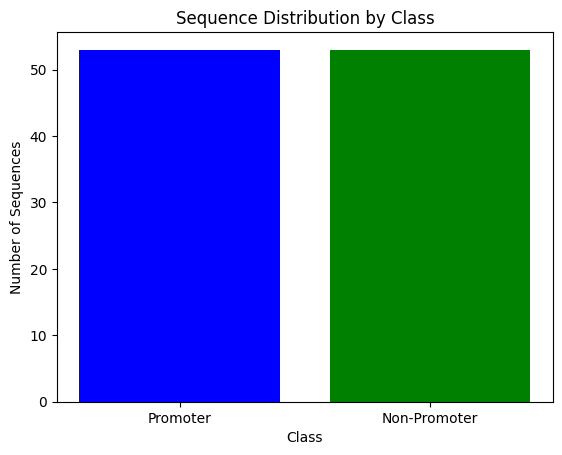

In [32]:
import matplotlib.pyplot as plt

# Number of sequences in each class
promoter_sequences = 53
non_promoter_sequences = 53

# Class labels
class_labels = ['Promoter', 'Non-Promoter']

# Number of sequences for each class
sequence_counts = [promoter_sequences, non_promoter_sequences]

# Create a bar graph
plt.bar(class_labels, sequence_counts, color=['blue', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Sequences')
plt.title('Sequence Distribution by Class')
plt.show()

In [15]:
df = numerical_df.drop(columns=['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
df

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
102,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
103,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0
104,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [16]:
df.Class.value_counts()

1    53
0    53
Name: Class, dtype: int64

In [17]:
label_map = {
    0: '-',
    1: '+',   
}

In [38]:
X = df.drop('Class', axis=1)
y = df['Class']

In [47]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
X = df.drop('Class', axis=1)
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Print the correlation matrix
correlation_matrix


,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,2_g,2_t,3_a,3_c,3_g,3_t,4_a,4_c,4_g,4_t,5_a,5_c,5_g,5_t,6_a,6_c,6_g,6_t,7_a,7_c,7_g,7_t,8_a,8_c,8_g,8_t,9_a,9_c,9_g,9_t,10_a,10_c,10_g,10_t,11_a,11_c,11_g,11_t,12_a,12_c,12_g,12_t,13_a,13_c,13_g,13_t,14_a,14_c,14_g,14_t,15_a,15_c,15_g,15_t,16_a,16_c,16_g,16_t,17_a,17_c,17_g,17_t,18_a,18_c,18_g,18_t,19_a,19_c,19_g,19_t,20_a,20_c,20_g,20_t,21_a,21_c,21_g,21_t,22_a,22_c,22_g,22_t,23_a,23_c,23_g,23_t,24_a,24_c,24_g,24_t,25_a,25_c,25_g,25_t,26_a,26_c,26_g,26_t,27_a,27_c,27_g,27_t,28_a,28_c,28_g,28_t,29_a,29_c,29_g,29_t,30_a,30_c,30_g,30_t,31_a,31_c,31_g,31_t,32_a,32_c,32_g,32_t,33_a,33_c,33_g,33_t,34_a,34_c,34_g,34_t,35_a,35_c,35_g,35_t,36_a,36_c,36_g,36_t,37_a,37_c,37_g,37_t,38_a,38_c,38_g,38_t,39_a,39_c,39_g,39_t,40_a,40_c,40_g,40_t,41_a,41_c,41_g,41_t,42_a,42_c,42_g,42_t,43_a,43_c,43_g,43_t,44_a,44_c,44_g,44_t,45_a,45_c,45_g,45_t,46_a,46_c,46_g,46_t,47_a,47_c,47_g,47_t,48_a,48_c,48_g,48_t,49_a,49_c,49_g,49_t,50_a,50_c,50_g,50_t,51_a,51_c,51_g,51_t,52_a,52_c,52_g,52_t,53_a,53_c,53_g,53_t,54_a,54_c,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t
0_a,1.000000,-0.333281,-0.231455,-4.261662e-01,7.799653e-02,-1.295541e-01,-0.046460,0.082692,0.079901,0.046708,0.106035,-0.232632,-0.129554,0.128576,0.006569,-0.019231,0.007862,-0.037751,0.092801,-0.075488,0.031296,0.034157,-0.129554,0.058323,0.168224,-0.228350,-0.069899,0.079901,0.031021,0.005287,-0.050755,0.007209,0.042887,0.086709,-0.037751,-0.088315,-0.038437,-0.075488,0.173412,-0.043165,-0.014666,-0.075488,0.083086,0.019099,-0.228350,0.019099,0.096476,0.092801,0.043617,-0.092865,0.043617,-0.015954,0.005931,0.031057,-0.034125,-0.008304,0.072265,-0.079456,4.622502e-03,-0.010758,-0.010147,0.005931,-0.050193,0.033102,-0.105638,-0.092865,1.315587e-01,0.005931,0.008535,0.043617,0.133747,-0.199434,-0.031334,0.098234,-0.134487,0.019070,-0.077305,-0.098852,0.018990,0.163106,5.630193e-02,-0.237686,-0.021422,0.171947,0.019099,-5.075459e-02,0.092801,-0.070192,0.032644,0.018990,0.079901,-0.131983,0.110714,-0.118327,0.141986,-1.360769e-01,0.141986,0.156731,-0.203635,-0.088315,0.106035,3.665740e-02,-0.203855,0.079901,-0.092898,0.044827,0.141986,-9.885207e-02,-0.189404,0.323276,-0.081658,-0.088315,0.092555,1.173700e-01,0.090240,-0.260392,0.112602,-0.172115,0.082692,-0.037751,-0.003472,-0.069899,0.101720,-0.029103,0.115502,-0.021422,-0.043165,-0.058471,5.931124e-03,5.931124e-03,0.049606,-0.047571,0.076581,-0.075488,0.031731,-0.025737,0.018990,-0.031334,-0.006822,0.018990,0.086709,-0.046460,-1.923077e-02,-0.015954,-0.106796,0.049606,-7.019231e-02,0.109531,-0.081658,0.046708,0.031731,0.007209,0.218922,-0.162838,-0.010147,-0.073895,-0.001674,-0.012612,-0.063315,0.069315,-0.002548,0.229453,0.034157,-0.232632,-0.094917,0.018990,0.119639,-0.051821,0.140775,-0.010147,-0.161768,0.031296,0.117370,-0.125506,0.190913,-0.131036,0.106035,0.020178,-6.292902e-02,-0.054753,0.096476,-0.167143,-0.046460,0.140775,0.119639,-0.125506,-0.098852,0.110714,-0.110120,0.150496,0.032644,-0.081658,0.072265,0.100461,-0.070192,-0.118327,-0.098852,-0.013533,9.255503e-02,3.264355e-02,0.106035,-0.029103,0.110714,-0.193710,0.069315,-0.088315,0.036657,-0.004467,0.096476,0.046708,-0.058471,-0.073895,0.032644,-0.040553,-0.021422,0.031226,0.031731,-0.054753,0.106035,-0.087320,-2.036353e-01,-0.005568,0.215498,-0.005568,0.069315,0.109358,0.006569,-0.156879
0_c,-0.333281,1.000000,-0.237352,-4.370244e-01,1.575438e-02,2.115451e-02,0.045880,-0.081658,0.017231,-0.073286,-0.006486,0.055790,-0.085625,0.017231,-0.006486,0.069315,-0.007764,-0.047398,0.029783,0.021155,-0.075173,-0.033730,0.127934,-0.005857,0.014482,0.035362,-0.019483,-0.030835,-0.077021,-0.060562,0.160802,-0.007119,-0.159255,0.074544,0.121956,-0.007119,-0.007764,0.181324,-0.060562,-0.104710,-0.075819,-0.085625,-0.050987,0.195336,0.144010,-0.090259,-0.069769,0.029783,-0.115926,0.155656,0.126923,-0.123409,0.097616,-0.211271,-0.097627,0.252658,0.007433,0.111467,-6.504714e-02,-0.032689,-0.019483,0.045880,0.156064,-0.119313,0.135379,0.027753,-1.08

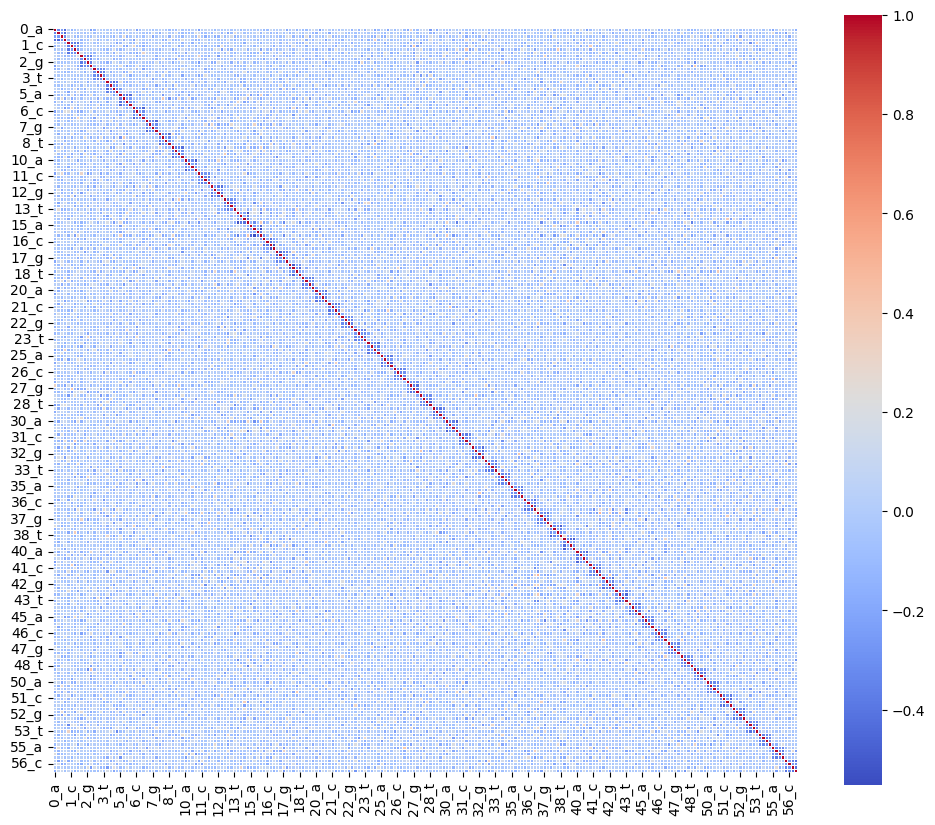

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5, square=True)
plt.savefig('correlation_matrix_1.png', format='png')

# Show the plot
plt.show()


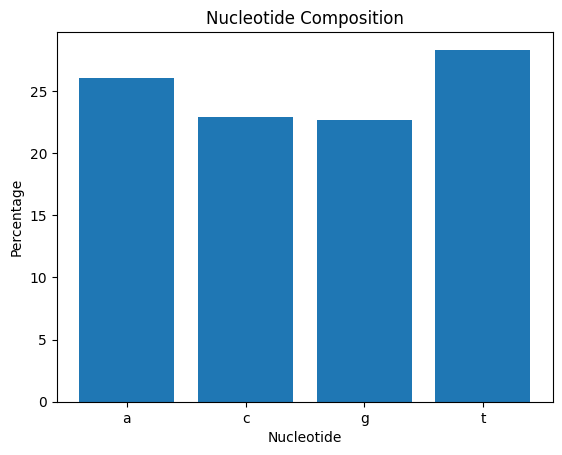

In [31]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
sequences = dfdata["Sequence"]
nucleotide_counts = {"a": 0, "c": 0, "g": 0, "t": 0}
for sequence in sequences:
    for nucleotide in sequence:
        if nucleotide!= '\t':
            nucleotide_counts[nucleotide] += 1
total_counts = sum(nucleotide_counts.values())
nucleotide_percentages = {nucleotide: count / total_counts * 100 for nucleotide, count in nucleotide_counts.items()}
labels = nucleotide_percentages.keys()
values = nucleotide_percentages.values()

plt.bar(labels, values)
plt.xlabel("Nucleotide")
plt.ylabel("Percentage")
plt.title("Nucleotide Composition")
plt.show()

# Proposed method for feature selection and Classification 

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

seed = 1
print(X.shape)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
print(X_poly.shape)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)
# Perform feature selection using SelectKBest
selector = SelectKBest(f_classif, k=1000)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Train the SVM model with the selected features
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_new, y_train)

# Evaluate the SVM model
from sklearn.metrics import accuracy_score,classification_report
svm_pred = svm_model.predict(X_test_new)
svm_acc = accuracy_score(y_test, svm_pred)

# Print the accuracy of the SVM model
print("Test data accuracy:", svm_acc)
print("Train data accuracy:",svm_model.score(X_train_new,y_train))
print(classification_report(y_test,svm_pred))
pd.DataFrame(X_train_new).head(11)

Test data accuracy: 1.0
Train data accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



C:\Users\nived\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    0   230   231   232   300   458   459   685   704   712   728   731
   779   783   794   812   892   907  1136  1137  1138  1150  1232  1360
  1361  1392  1569  1583  1684  2026  2027  2028  2154  2246  2247  2300
  2465  2650  2741  2833  2857  2863  2866  2880  2900  2901  2902  3116
  3117  3200  3314  3331  3428  3480  3669  3673  3758  3759  3760  3970
  3971  4014  4181  4319  4401  4445  4489  4524  4543  4574  4586  4600
  4601  4602  4808  4809  4816  4821  4823  4828  4835  4850  4860  4864
  5015  5050  5201  5206  5305  5422  5426  5427  5428  5630  5631  5697
  5705  5712  5833  5933  5938  5942  5948  5983  6020  6072  6236  6237
  6238  6436  6437  6471  6514  6571  6635  6658  6716  6725  6737  6761
  6781  6800  6819  6820  7030  7031  7032  7226  7227  7277  7300  7421
  7433  7484  7611  7637  7711  7808  7809  78

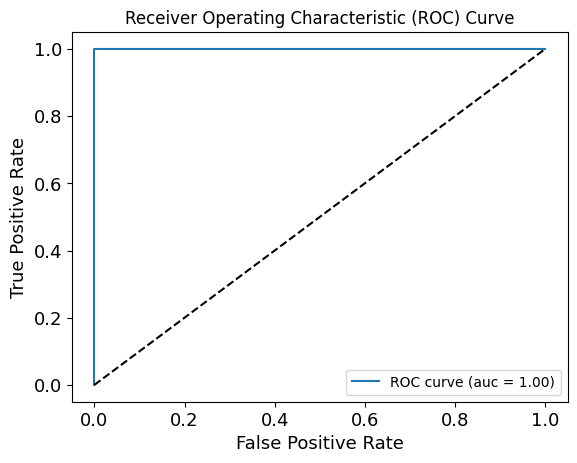

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = svm_model.predict_proba(X_test_new)[:, 1]

# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (auc = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xticks(fontsize=13)                # Set the font size for x-axis tick labels
plt.yticks(fontsize=13)                # Set the font size for y-axis tick labels
plt.legend(loc="lower right")
plt.savefig("ROC_proposed.png")
plt.show()

# Comparison of models

Test--  Nearest Neighbors :  0.8125

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.62      0.77        16

    accuracy                           0.81        32
   macro avg       0.86      0.81      0.81        32
weighted avg       0.86      0.81      0.81        32



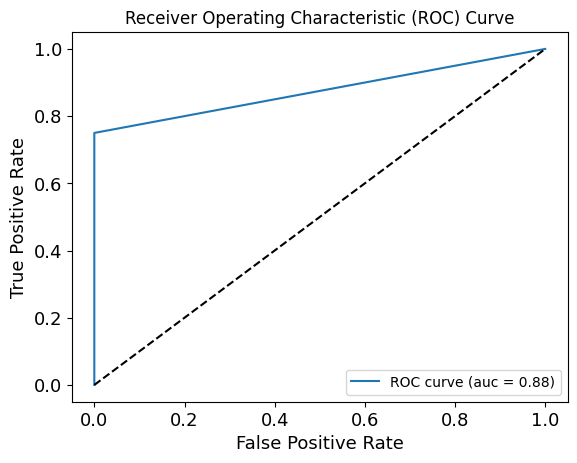

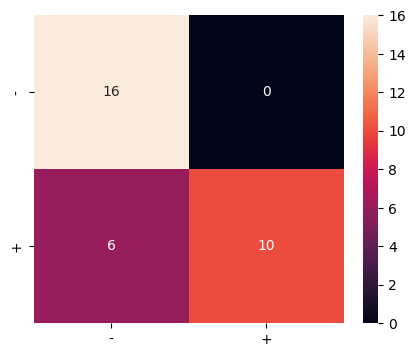

Test--  Gaussian Process :  0.875

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.75      0.86        16

    accuracy                           0.88        32
   macro avg       0.90      0.88      0.87        32
weighted avg       0.90      0.88      0.87        32



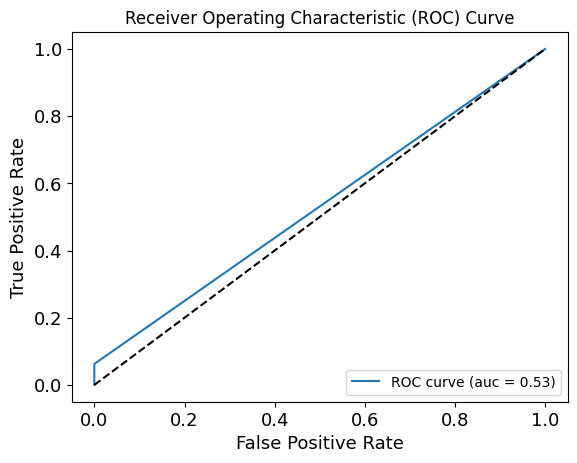

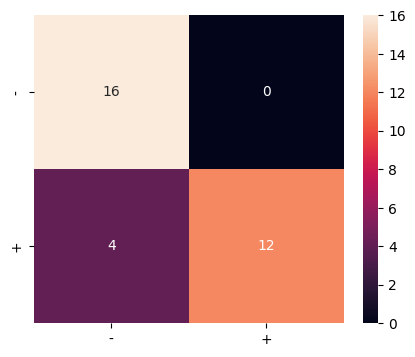

Test--  Decision Tree :  0.875

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.80      1.00      0.89        16

    accuracy                           0.88        32
   macro avg       0.90      0.88      0.87        32
weighted avg       0.90      0.88      0.87        32



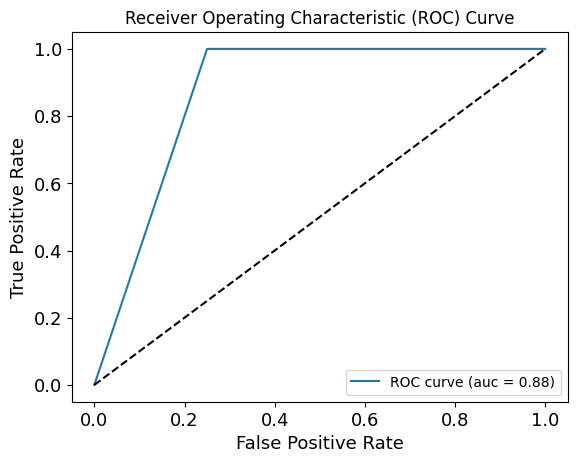

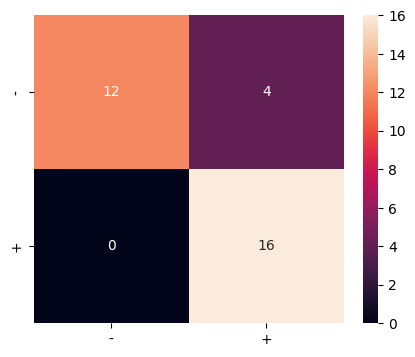

Test--  Random Forest :  0.8125

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.92      0.69      0.79        16

    accuracy                           0.81        32
   macro avg       0.83      0.81      0.81        32
weighted avg       0.83      0.81      0.81        32



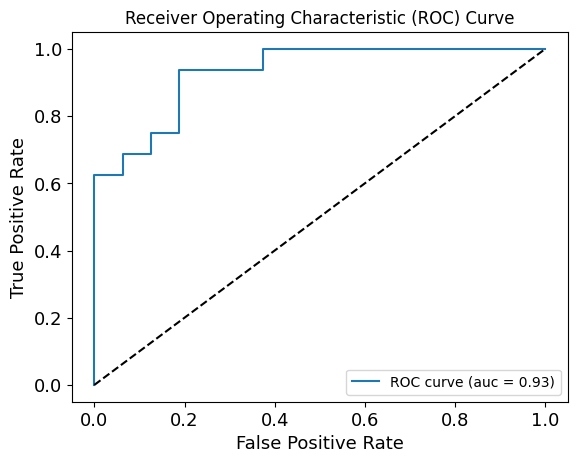

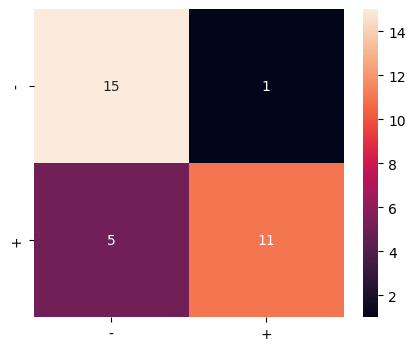

C:\Users\nived\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test--  Neural Net :  0.96875

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.94      0.97        16

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



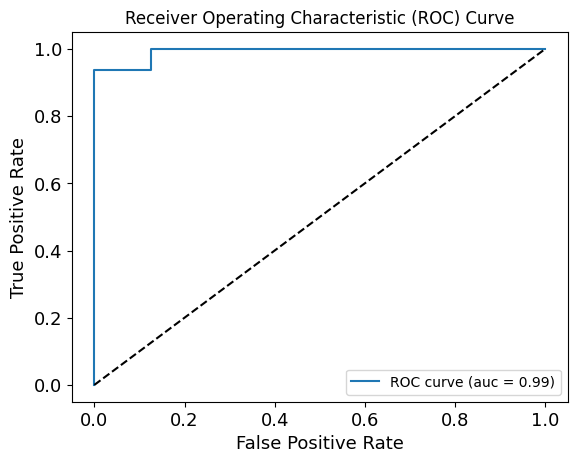

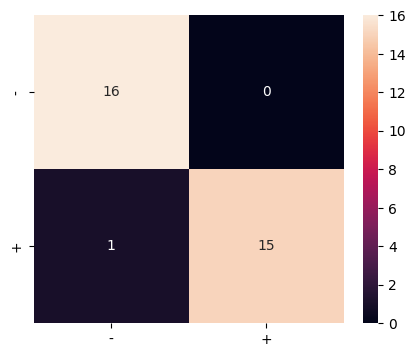

Test--  AdaBoost :  0.96875

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.94      0.97        16

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



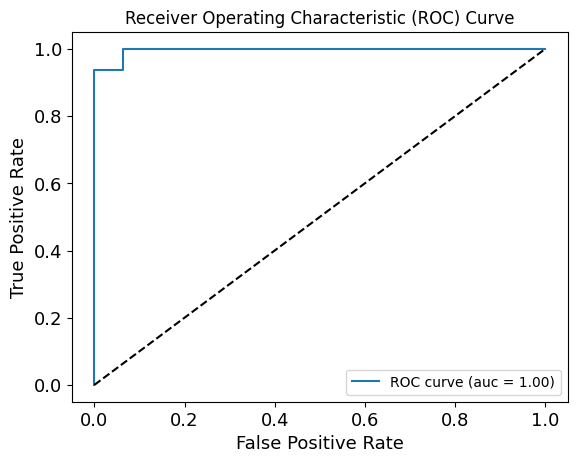

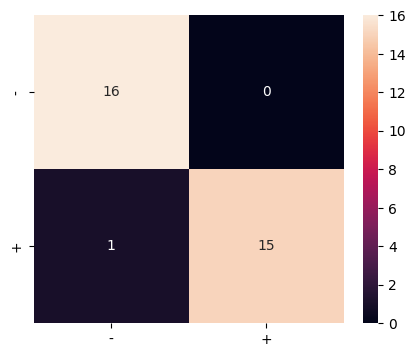

Test--  Naive Bayes :  0.875

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.83      0.94      0.88        16

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.88      0.88      0.87        32



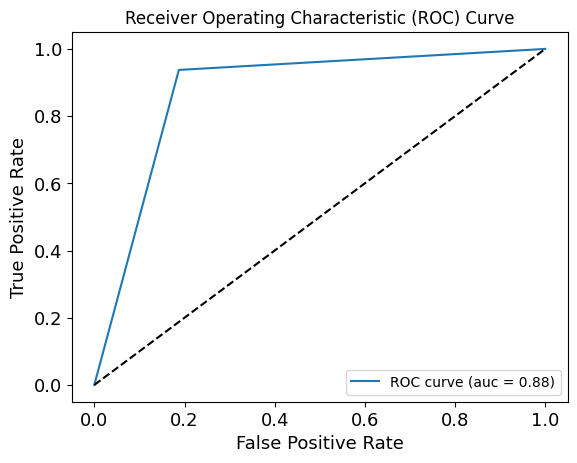

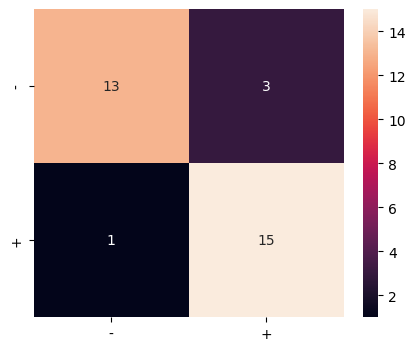

Test--  SVM Linear :  0.96875

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.94      0.97        16

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



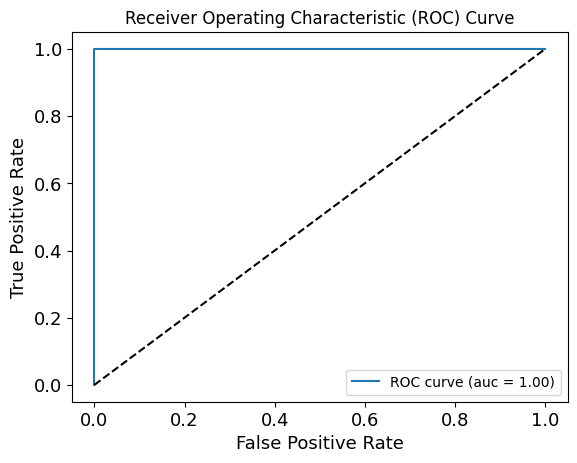

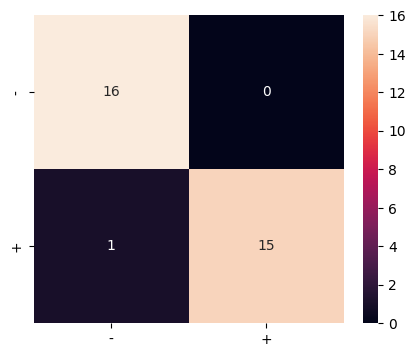

Test--  SVM RBF :  1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



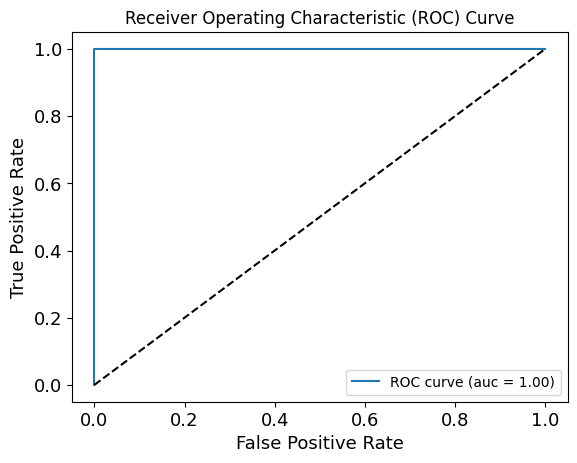

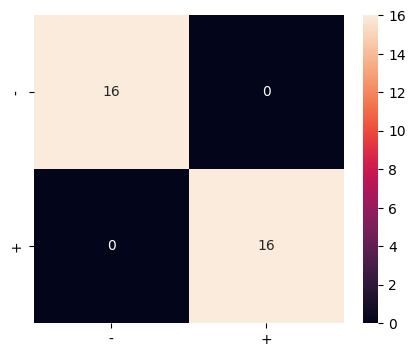

Test--  SVM Sigmoid :  1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



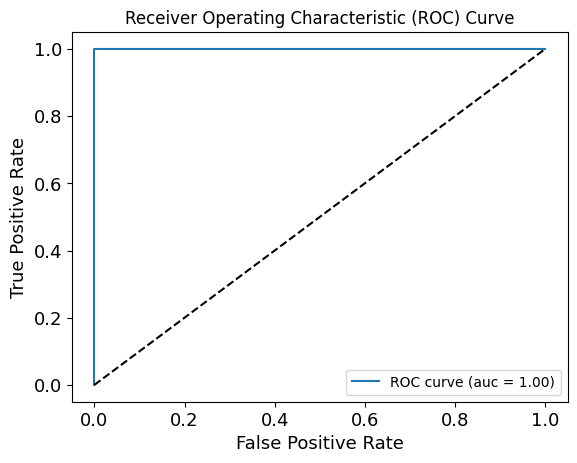

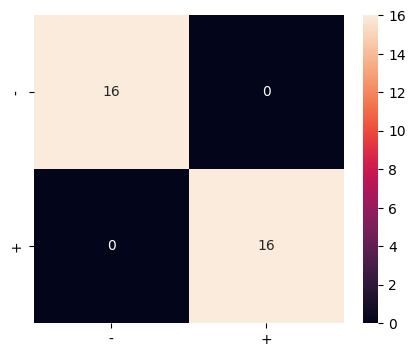

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel = 'linear',probability=True), 
    SVC(kernel = 'rbf',probability=True),
    SVC(kernel = 'sigmoid',probability=True)
]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    model.fit(X_train_new, y_train)
    predictions = model.predict(X_test_new)
    print('Test-- ',name,': ',accuracy_score(y_test, predictions))
    print()
    print(classification_report(y_test, predictions))
    y_pred_proba = model.predict_proba(X_test_new)[:, 1]

    # calculate the false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (auc = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=13)
    plt.ylabel('True Positive Rate',fontsize=13)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.xticks(fontsize=13)                # Set the font size for x-axis tick labels
    plt.yticks(fontsize=13)    
    filename = f'ROC_{name}.png'
    # Save the plot with the generated filename
    plt.savefig(filename)
    plt.show()
    plt.figure(figsize=(5,4))
    conf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
    plt.show()

# Intermediate results visualization

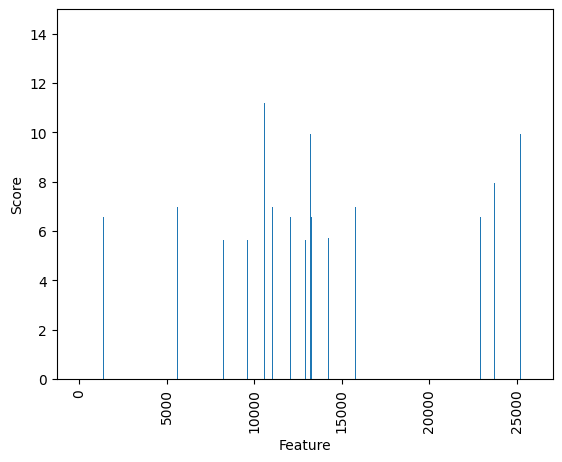

In [41]:
X_train_df=pd.DataFrame(X_train)
scores = selector.scores_
feature_names = X_train_df.columns

# create a DataFrame with feature scores and names
df = pd.DataFrame({'Feature': feature_names, 'Score': scores})
df = df.sort_values('Score', ascending=False)
df = df.head(1000)

# create a bar chart of the top 10 features
plt.bar(df['Feature'], df['Score'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Score')
#plt.title('Top 1000 Features Selected by SelectKBest')
plt.ylim(0, 15)
plt.savefig("1000_score.png")
plt.show()

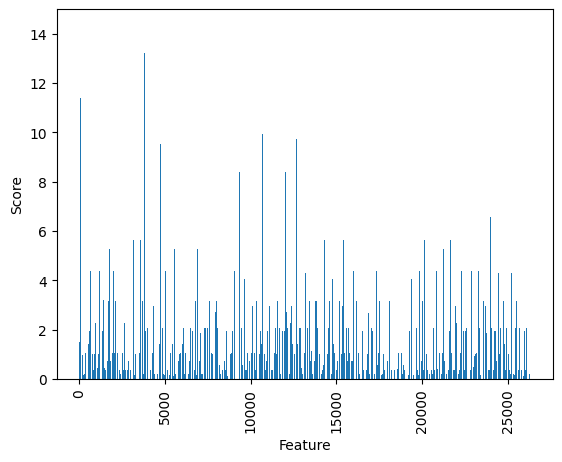

In [42]:
X_train_df=pd.DataFrame(X_train)
scores = selector.scores_
feature_names = X_train_df.columns

# create a DataFrame with feature scores and names
df = pd.DataFrame({'Feature': feature_names, 'Score': scores})
df = df.sort_values('Score', ascending=False)

# create a bar chart of the top 10 features
plt.bar(df['Feature'], df['Score'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Score')
#plt.title('Top 1000 Features Selected by SelectKBest')
plt.ylim(0, 15)
plt.savefig("All_score.png")
plt.show()

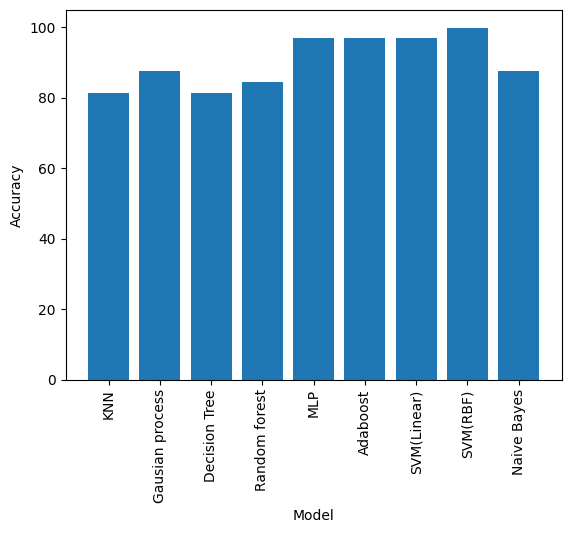

In [71]:
import matplotlib.pyplot as plt

# create the data
x = ['KNN', 'Gausian process', 'Decision Tree', 'Random forest', 'MLP','Adaboost','SVM(Linear)','SVM(RBF)','Naive Bayes']
y = [81.25, 87.5,81.25,84.375,96.875,96.875,96.875,99.9,87.5]

# create the bar chart
plt.bar(x, y)

# add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.savefig("Comparison_DNA.png")
# display the plot
plt.show()

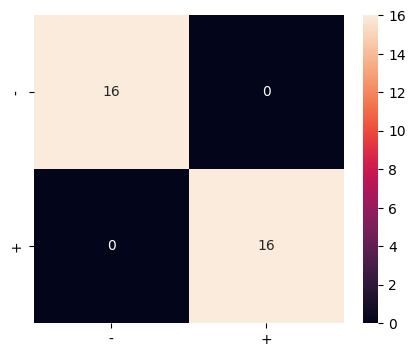

In [62]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,4))
conf_matrix = confusion_matrix(y_test,svm_pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.savefig('ConfusionMatrix_DNA_svm.png')
plt.show()

# Classification reports of other models

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Gaussian Process",
         "Decision Tree", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB()
]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold()
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('Test-- ',name,': ',accuracy_score(y_test, predictions))
    print()
    print(classification_report(y_test, predictions))

Gaussian Process: 0.528571 (0.141965)
Test--  Gaussian Process :  0.53125

              precision    recall  f1-score   support

           0       0.52      1.00      0.68        16
           1       1.00      0.06      0.12        16

    accuracy                           0.53        32
   macro avg       0.76      0.53      0.40        32
weighted avg       0.76      0.53      0.40        32

Decision Tree: 0.715238 (0.055566)
Test--  Decision Tree :  0.875

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.83      0.94      0.88        16

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.88      0.88      0.87        32

Neural Net: 0.862857 (0.090471)
Test--  Neural Net :  0.96875

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.9